In [26]:
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium import plugins
import geopandas
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import math
import folium
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, style
import seaborn as sns
style.use('ggplot')
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 인구 데이터랑 같이 보기

In [4]:
pop = pd.read_csv('행정동별_거주인구_성별_연령.csv').drop(['Unnamed: 0'],axis=1)
pop

,ADMI_CD,ADMI_NM,5559세_2,5559세_1,5054세_1,5054세_2,4549세_1,4549세_2,4044세_1,4044세_2,...,2529세_1,2529세_2,2024세_1,2024세_2,1519세_1,1519세_2,1014세_1,1014세_2,0509세_2,0509세_1
0,1117051000,후암동,757,709,722,763,745,782,601,653,...,783,748,540,524,422,330,310,270,266,299
1,1159053000,상도1동,1691,1439,1535,1723,1716,1678,1616,1657,...,2631,2201,2346,2649,977,908,792,773,839,880
2,1111070000,숭인1동,288,305,254,293,292,258,216,202,...,228,225,184,179,102,114,85,92,94,98
3,1111061500,종로1.2.3.4가동,251,549,431,164,341,218,242,157,...,308,212,142,195,59,66,58,41,46,54
4,1117057000,원효로2동,547,586,569,634,633,640,530,576,...,501,530,385,471,292,440,230,341,267,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,425,592,589,369,411,338,284,210,...,498,368,257,283,96,99,72,56,65,74
420,1156055000,당산1동,783,774,783,756,799,718,754,701,...,1087,1256,552,708,300,301,220,212,274,253
421,1141072000,북가좌2동,1486,1272,1390,1399,1383,1438,1147,1191,...,1373,1310,1116,1110,768,726,544,525,477,547
422,1165062000,방배3동,1024,856,838,916,852,1027,686,786,...,805,720,714,688,666,547,393,460,368,396


In [5]:
# 연령대별로 성별 합산
age_ = []
for i in range(len(pop)):
    age_.append((pop['0509세_1'][i] +  pop['0509세_2'][i]))
pop['0509세'] = age_


for j in range(1,6):
    age_tmp1,age_tmp2 = [],[]
    for i in range(len(pop)):
        age_tmp1.append((pop[f'{j}5{j}9세_1'][i] +  pop[f'{j}5{j}9세_2'][i]))
        age_tmp2.append((pop[f'{j}0{j}4세_1'][i] +  pop[f'{j}0{j}4세_2'][i]))
    
    pop[f'{j}0{j}4세'] = age_tmp2
    pop[f'{j}5{j}9세'] = age_tmp1

In [6]:
pop

,ADMI_CD,ADMI_NM,5559세_2,5559세_1,5054세_1,5054세_2,4549세_1,4549세_2,4044세_1,4044세_2,...,1014세,1519세,2024세,2529세,3034세,3539세,4044세,4549세,5054세,5559세
0,1117051000,후암동,757,709,722,763,745,782,601,653,...,580,752,1064,1531,1392,1454,1254,1527,1485,1466
1,1159053000,상도1동,1691,1439,1535,1723,1716,1678,1616,1657,...,1565,1885,4995,4832,3165,3293,3273,3394,3258,3130
2,1111070000,숭인1동,288,305,254,293,292,258,216,202,...,177,216,363,453,398,447,418,550,547,593
3,1111061500,종로1.2.3.4가동,251,549,431,164,341,218,242,157,...,99,125,337,520,443,462,399,559,595,800
4,1117057000,원효로2동,547,586,569,634,633,640,530,576,...,571,732,856,1031,988,1099,1106,1273,1203,1133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,425,592,589,369,411,338,284,210,...,128,195,540,866,667,552,494,749,958,1017
420,1156055000,당산1동,783,774,783,756,799,718,754,701,...,432,601,1260,2343,2283,1945,1455,1517,1539,1557
421,1141072000,북가좌2동,1486,1272,1390,1399,1383,1438,1147,1191,...,1069,1494,2226,2683,2090,2354,2338,2821,2789,2758
422,1165062000,방배3동,1024,856,838,916,852,1027,686,786,...,853,1213,1402,1525,1497,1552,1472,1879,1754,1880


In [7]:
age_ = []
for i in range(len(pop)):
    age_.append((pop['0509세'][i] +  pop['1014세'][i]))
pop['0514세'] = age_

In [8]:
pop_df = pop[['ADMI_CD', 'ADMI_NM','0509세', '1014세','0514세']]
pop_df

,ADMI_CD,ADMI_NM,0509세,1014세,0514세
0,1117051000,후암동,565,580,1145
1,1159053000,상도1동,1719,1565,3284
2,1111070000,숭인1동,192,177,369
3,1111061500,종로1.2.3.4가동,100,99,199
4,1117057000,원효로2동,538,571,1109
...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267
420,1156055000,당산1동,527,432,959
421,1141072000,북가좌2동,1024,1069,2093
422,1165062000,방배3동,764,853,1617


In [9]:
pop

,ADMI_CD,ADMI_NM,5559세_2,5559세_1,5054세_1,5054세_2,4549세_1,4549세_2,4044세_1,4044세_2,...,1519세,2024세,2529세,3034세,3539세,4044세,4549세,5054세,5559세,0514세
0,1117051000,후암동,757,709,722,763,745,782,601,653,...,752,1064,1531,1392,1454,1254,1527,1485,1466,1145
1,1159053000,상도1동,1691,1439,1535,1723,1716,1678,1616,1657,...,1885,4995,4832,3165,3293,3273,3394,3258,3130,3284
2,1111070000,숭인1동,288,305,254,293,292,258,216,202,...,216,363,453,398,447,418,550,547,593,369
3,1111061500,종로1.2.3.4가동,251,549,431,164,341,218,242,157,...,125,337,520,443,462,399,559,595,800,199
4,1117057000,원효로2동,547,586,569,634,633,640,530,576,...,732,856,1031,988,1099,1106,1273,1203,1133,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,425,592,589,369,411,338,284,210,...,195,540,866,667,552,494,749,958,1017,267
420,1156055000,당산1동,783,774,783,756,799,718,754,701,...,601,1260,2343,2283,1945,1455,1517,1539,1557,959
421,1141072000,북가좌2동,1486,1272,1390,1399,1383,1438,1147,1191,...,1494,2226,2683,2090,2354,2338,2821,2789,2758,2093
422,1165062000,방배3동,1024,856,838,916,852,1027,686,786,...,1213,1402,1525,1497,1552,1472,1879,1754,1880,1617


In [10]:
pop_df.columns = ['행정동코드','행정동','0509세','1014세','0514세']

In [11]:
pop_df

,행정동코드,행정동,0509세,1014세,0514세
0,1117051000,후암동,565,580,1145
1,1159053000,상도1동,1719,1565,3284
2,1111070000,숭인1동,192,177,369
3,1111061500,종로1.2.3.4가동,100,99,199
4,1117057000,원효로2동,538,571,1109
...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267
420,1156055000,당산1동,527,432,959
421,1141072000,북가좌2동,1024,1069,2093
422,1165062000,방배3동,764,853,1617


In [12]:
pop_df.to_csv('0514세.csv')
pop_df.to_pickle('0514세.pkl')

In [336]:
demand['0514세'].max()

7384

In [370]:
demand['돌봄교실_개수'].isna().sum()

208

In [373]:
demand['돌봄센터 수'].isna().sum()

208

In [354]:
# 0514로 정렬
demand.sort_values(by='0514세',
                 axis=0,
                 ascending=False,
                 inplace=True,
                 kind='quicksort',
                 na_position='last')
demand.reset_index(drop=True, inplace=True)
demand

,행정동코드,행정동,0509세,1014세,0514세,돌봄교실_개수,돌봄교실_이용인원,위도,경도,돌봄센터 수,방과후아카데미 수,지역아동센터 수,총시설수,tfidf,돌봄교실이용비율,tfidf*이용비율
0,1138069000,진관동,3294,4090,7384,21.0,464.0,188.207722,634.648952,2.0,0.0,2.0,25.0,25.928177,0.010600,0.274836
1,1147055000,목5동,2586,4005,6591,10.0,237.0,150.152447,507.516329,0.0,0.0,6.0,16.0,16.953039,0.005414,0.091787
2,1171067000,잠실2동,2964,3333,6297,7.0,127.0,75.028854,254.169577,2.0,0.0,0.0,9.0,9.972376,0.002901,0.028933
3,1168070000,세곡동,3120,2490,5610,21.0,458.0,149.880186,508.404531,2.0,0.0,2.0,25.0,25.928177,0.010463,0.271282
4,1121581000,광장동,2432,3039,5471,13.0,310.0,112.633913,381.300790,0.0,0.0,1.0,14.0,14.958564,0.007082,0.105934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1111054000,삼청동,59,106,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,1111063000,종로5.6가동,64,82,146,2.0,47.0,37.572683,127.003491,0.0,0.0,8.0,10.0,10.969613,0.001074,0.011778
421,1114055000,명동,60,64,124,4.0,63.0,37.559785,126.986756,0.0,0.0,0.0,4.0,4.986188,0.001439,0.007176
422,1114060500,을지로동,27,17,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pop_df = pd.read_pickle('0514세.pkl')
pop_df

,행정동코드,행정동,0509세,1014세,0514세
0,1117051000,후암동,565,580,1145
1,1159053000,상도1동,1719,1565,3284
2,1111070000,숭인1동,192,177,369
3,1111061500,종로1.2.3.4가동,100,99,199
4,1117057000,원효로2동,538,571,1109
...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267
420,1156055000,당산1동,527,432,959
421,1141072000,북가좌2동,1024,1069,2093
422,1165062000,방배3동,764,853,1617


## 행정동별 주변공적돌봄시설

In [3]:
df = pd.read_csv('행정동별_주변공적돌봄시설.csv').drop(['Unnamed: 0'],axis=1)
df

,행정동코드,시군구명,읍면동명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수
0,1111053000,종로구,사직동,0.0,0.0,0.0,65.0,3.0,0.0,0.0,0.0,0.0
1,1111054000,종로구,삼청동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1111055000,종로구,부암동,0.0,0.0,0.0,111.0,5.0,0.0,0.0,0.0,0.0
3,1111056000,종로구,평창동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1111057000,종로구,무악동,0.0,0.0,0.0,80.0,4.0,35.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
419,1174070000,강동구,둔촌제2동,0.0,0.0,0.0,153.0,7.0,50.0,1.0,0.0,0.0
420,1174057000,강동구,암사제1동,20.0,4.0,1.0,97.0,4.0,71.0,2.0,0.0,0.0
421,1174061000,강동구,천호제2동,0.0,0.0,0.0,100.0,4.0,59.0,2.0,0.0,0.0
422,1174068500,강동구,길동,0.0,0.0,0.0,255.0,13.0,129.0,5.0,0.0,0.0


In [14]:
df.columns

Index(['행정동코드', '시군구명', '읍면동명', '키움센터_상시돌봄정원', '키움센터_일시돌봄정원', '키움센터_개수',
       '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원', '지역아동센터_개수', '방과후아카데미_정원',
       '방과후아카데미_개수'],
      dtype='object')

In [15]:
df.columns = ['행정동코드', '시군구명', '행정동', '키움센터_상시돌봄정원', '키움센터_일시돌봄정원', '키움센터_개수',
       '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원', '지역아동센터_개수', '방과후아카데미_정원',
       '방과후아카데미_개수']

In [86]:
df['행정동'].unique()

array(['사직동', '삼청동', '부암동', '평창동', '무악동', '교남동', '가회동', '종로1.2.3.4가동',
       '종로5.6가동', '이화동', '창신제1동', '창신제2동', '창신제3동', '숭인제1동', '숭인제2동',
       '청운효자동', '혜화동', '소공동', '회현동', '명동', '필동', '장충동', '광희동', '을지로동',
       '신당제5동', '황학동', '중림동', '신당동', '다산동', '약수동', '청구동', '동화동', '후암동',
       '용산2가동', '남영동', '원효로제2동', '효창동', '용문동', '이촌제1동', '이촌제2동', '이태원제1동',
       '이태원제2동', '서빙고동', '보광동', '청파동', '원효로제1동', '한강로동', '한남동', '왕십리제2동',
       '마장동', '사근동', '행당제1동', '행당제2동', '응봉동', '금호1가동', '금호4가동', '성수1가제1동',
       '성수1가제2동', '성수2가제1동', '성수2가제3동', '송정동', '용답동', '왕십리도선동', '금호2.3가동',
       '옥수동', '화양동', '군자동', '중곡제1동', '중곡제2동', '중곡제3동', '중곡제4동', '능동',
       '구의제1동', '구의제2동', '구의제3동', '광장동', '자양제1동', '자양제2동', '자양제3동',
       '자양제4동', '회기동', '휘경제1동', '휘경제2동', '청량리동', '용신동', '제기동', '전농제1동',
       '전농제2동', '답십리제2동', '장안제1동', '장안제2동', '이문제1동', '이문제2동', '답십리제1동',
       '면목제2동', '면목제4동', '면목제5동', '면목제7동', '상봉제1동', '상봉제2동', '중화제1동',
       '중화제2동', '묵제1동', '묵제2동', '망우제3동', '신내1동', '신내2동', '면목본동',


In [87]:
pop_df['행정동'].unique()

array(['후암동', '상도1동', '숭인1동', '종로1.2.3.4가동', '원효로2동', '신당5동', '청운효자동',
       '이촌2동', '창1동', '이태원2동', '신월5동', '대치4동', '상봉1동', '대흥동', '묵2동',
       '신대방2동', '답십리2동', '황학동', '개봉2동', '방배4동', '일원1동', '성산1동', '충현동',
       '신원동', '아현동', '수유1동', '화곡2동', '전농1동', '거여2동', '고덕1동', '화양동',
       '구로2동', '광장동', '가양1동', '풍납1동', '논현1동', '목3동', '서빙고동', '소공동', '문래동',
       '북가좌1동', '이촌1동', '창신3동', '대방동', '잠실2동', '개봉1동', '번2동', '제기동',
       '방학1동', '삼전동', '면목3.8동', '방배본동', '둔촌2동', '일원본동', '종암동', '잠실본동',
       '망우3동', '여의동', '삼성2동', '중곡2동', '미성동', '이태원1동', '천연동', '화곡6동',
       '신도림동', '상도2동', '중계4동', '무악동', '세곡동', '서원동', '돈암1동', '쌍문3동',
       '신사2동', '상계9동', '화곡1동', '방이1동', '서교동', '중림동', '화곡3동', '한남동',
       '마천1동', '대치2동', '면목2동', '신림동', '대조동', '신정1동', '신당동', '염리동', '방화3동',
       '중계2.3동', '시흥4동', '난곡동', '인헌동', '가락본동', '합정동', '응봉동', '삼성1동',
       '남현동', '금호1가동', '상암동', '도봉2동', '천호2동', '보문동', '방화2동', '압구정동',
       '개포2동', '삼각산동', '도봉1동', '영등포동', '금호2.3가동', '시흥5동', '신촌동', '회기동',
       '길음2동', '

In [161]:
# 서로 행정동이 다르므로 행정동코드로 merge
demand = pd.merge(pop_df,df,how='left',on=['행정동코드'])

In [77]:
demand.drop(['시군구명'],axis=1,inplace=True)

In [163]:
demand.drop(['행정동_x'],axis=1,inplace=True)

In [168]:
demand = demand[['행정동코드','행정동_y', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수']]

In [169]:
demand = demand.rename(columns={'행정동_y':'행정동'})

In [172]:
# nan값 0으로 대체
for i in range(6,len(demand.columns)):
    for j in range(len(demand)):
        if math.isnan(demand.iloc[:,i][j]) == True:
            demand.iloc[:,i][j] = 0.0
demand

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수
0,1117051000,후암동,565,580,1145,용산구,0.0,0.0,0.0,129.0,7.0,109.0,3.0,0.0,0.0
1,1159053000,상도제1동,1719,1565,3284,동작구,0.0,0.0,0.0,252.0,11.0,64.0,2.0,0.0,0.0
2,1111070000,숭인제1동,192,177,369,종로구,0.0,0.0,0.0,0.0,0.0,29.0,1.0,0.0,0.0
3,1111061500,종로1.2.3.4가동,100,99,199,종로구,0.0,0.0,0.0,50.0,3.0,0.0,0.0,0.0,0.0
4,1117057000,원효로제2동,538,571,1109,용산구,0.0,0.0,0.0,62.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267,구로구,0.0,0.0,0.0,77.0,4.0,81.0,3.0,0.0,0.0
420,1156055000,당산제1동,527,432,959,영등포구,25.0,5.0,1.0,0.0,0.0,70.0,2.0,0.0,0.0
421,1141072000,북가좌제2동,1024,1069,2093,서대문구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,1165062000,방배3동,764,853,1617,서초구,0.0,0.0,0.0,40.0,2.0,0.0,0.0,0.0,0.0


In [173]:
sum(demand['방과후아카데미_개수'].tolist())

18.0

In [174]:
sum(demand['초등돌봄교실_교실개수'].tolist())

2053.0

In [175]:
sum(demand['지역아동센터_개수'].tolist())

456.0

In [176]:
sum(demand['키움센터_개수'].tolist())

91.0

In [177]:
new_demand.columns

Index(['행정동코드', '행정동', '0509세', '1014세', '0514세', '키움센터_상시돌봄정원', '키움센터_일시돌봄정원',
       '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원', '지역아동센터_개수', '방과후아카데미_정원',
       '방과후아카데미_개수', '키움센터_개수', '총시설수'],
      dtype='object')

In [178]:
demand['총시설수'] = [demand['초등돌봄교실_교실개수'][i] + demand['지역아동센터_개수'][i] + demand['방과후아카데미_개수'][i] + demand['키움센터_개수'][i] for i in range(len(demand))]


In [179]:
demand

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수
0,1117051000,후암동,565,580,1145,용산구,0.0,0.0,0.0,129.0,7.0,109.0,3.0,0.0,0.0,10.0
1,1159053000,상도제1동,1719,1565,3284,동작구,0.0,0.0,0.0,252.0,11.0,64.0,2.0,0.0,0.0,13.0
2,1111070000,숭인제1동,192,177,369,종로구,0.0,0.0,0.0,0.0,0.0,29.0,1.0,0.0,0.0,1.0
3,1111061500,종로1.2.3.4가동,100,99,199,종로구,0.0,0.0,0.0,50.0,3.0,0.0,0.0,0.0,0.0,3.0
4,1117057000,원효로제2동,538,571,1109,용산구,0.0,0.0,0.0,62.0,3.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267,구로구,0.0,0.0,0.0,77.0,4.0,81.0,3.0,0.0,0.0,7.0
420,1156055000,당산제1동,527,432,959,영등포구,25.0,5.0,1.0,0.0,0.0,70.0,2.0,0.0,0.0,3.0
421,1141072000,북가좌제2동,1024,1069,2093,서대문구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,1165062000,방배3동,764,853,1617,서초구,0.0,0.0,0.0,40.0,2.0,0.0,0.0,0.0,0.0,2.0


In [209]:
# 총 시설수 합한 데이터프레임 저장
demand.to_pickle('행정동별_공적돌봄시설.pkl')
demand.to_csv('행정동별_공적돌봄시설.csv',index=False)

In [182]:
cnt = 0
for i in range(len(demand['총시설수'])):
    if demand['총시설수'][i] != 0:
        cnt += 1
cnt

400

In [248]:
# 행정동별 센터 tfidf (tf 단순빈도, smoothing)
# tf = [np.log(float(df_sum['총시설수'][i] + 1)) for i in range(len(df_sum))]
# idf = np.log(len(df_sum.행정동.unique()) / (1+cnt))
# tfidf = [x*idf for x in tf]

In [142]:
#행정동별 센터 tfidf (tf 증가빈도, double normalization k, smoothing)
# tf = [(0.5 + 0.5*float(demand['총시설수'][i] + 1)/max(demand['총시설수'])) for i in range(len(demand))]
# idf = np.log((len(demand.행정동.unique()) / (1+cnt)))
# tfidf = [x*idf for x in tf]
# tfidf

In [183]:
# 행정동별 센터 tfidf (tf 단순빈도,  smoothing, idf log)
tf = [(float(demand['총시설수'][i] + 1)) for i in range(len(demand))]
idf = np.log(len(demand.행정동.unique()) / (1+cnt))
tfidf = [x*idf for x in tf]

이 식이 제일 낫다

In [184]:
demand['tfidf'] = tfidf
demand

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,tfidf
0,1117051000,후암동,565,580,1145,용산구,0.0,0.0,0.0,129.0,7.0,109.0,3.0,0.0,0.0,10.0,0.587518
1,1159053000,상도제1동,1719,1565,3284,동작구,0.0,0.0,0.0,252.0,11.0,64.0,2.0,0.0,0.0,13.0,0.747751
2,1111070000,숭인제1동,192,177,369,종로구,0.0,0.0,0.0,0.0,0.0,29.0,1.0,0.0,0.0,1.0,0.106822
3,1111061500,종로1.2.3.4가동,100,99,199,종로구,0.0,0.0,0.0,50.0,3.0,0.0,0.0,0.0,0.0,3.0,0.213643
4,1117057000,원효로제2동,538,571,1109,용산구,0.0,0.0,0.0,62.0,3.0,0.0,0.0,0.0,0.0,3.0,0.213643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267,구로구,0.0,0.0,0.0,77.0,4.0,81.0,3.0,0.0,0.0,7.0,0.427286
420,1156055000,당산제1동,527,432,959,영등포구,25.0,5.0,1.0,0.0,0.0,70.0,2.0,0.0,0.0,3.0,0.213643
421,1141072000,북가좌제2동,1024,1069,2093,서대문구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053411
422,1165062000,방배3동,764,853,1617,서초구,0.0,0.0,0.0,40.0,2.0,0.0,0.0,0.0,0.0,2.0,0.160232


In [185]:
sum(demand['키움센터_상시돌봄정원'])

2187.0

In [194]:
demand['돌봄교실이용비율'] = [x/sum(demand['초등돌봄교실_이용인원']) for x in demand['초등돌봄교실_이용인원']]

In [195]:
demand['tfidf*이용비율'] = [demand.tfidf[i] * demand.돌봄교실이용비율[i] for i in range(len(demand))]
demand

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,...,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수,총시설수,tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율
0,1117051000,후암동,565,580,1145,용산구,0.0,0.0,0.0,129.0,...,3.0,0.0,0.0,10.0,0.587518,0.002953,0.001735,0.001570,2.724401e-06,0.006366
1,1159053000,상도제1동,1719,1565,3284,동작구,0.0,0.0,0.0,252.0,...,2.0,0.0,0.0,13.0,0.747751,0.005769,0.004314,0.004503,1.942741e-05,0.003738
2,1111070000,숭인제1동,192,177,369,종로구,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.106822,0.000000,0.000000,0.000506,0.000000e+00,0.001694
3,1111061500,종로1.2.3.4가동,100,99,199,종로구,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,3.0,0.213643,0.001145,0.000245,0.000273,6.673693e-08,0.000000
4,1117057000,원효로제2동,538,571,1109,용산구,0.0,0.0,0.0,62.0,...,0.0,0.0,0.0,3.0,0.213643,0.001419,0.000303,0.001521,4.611756e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267,구로구,0.0,0.0,0.0,77.0,...,3.0,0.0,0.0,7.0,0.427286,0.001763,0.000753,0.000366,2.757878e-07,0.004730
420,1156055000,당산제1동,527,432,959,영등포구,25.0,5.0,1.0,0.0,...,2.0,0.0,0.0,3.0,0.213643,0.000000,0.000000,0.001315,0.000000e+00,0.005840
421,1141072000,북가좌제2동,1024,1069,2093,서대문구,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.002870,0.000000e+00,0.000000
422,1165062000,방배3동,764,853,1617,서초구,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,2.0,0.160232,0.000916,0.000147,0.002217,3.253677e-07,0.000000


In [235]:
demand['정원 및 이용비율'][421]

0.0

In [188]:
demand['행정동별0514세/전체0514세'] = [demand['0514세'][i]/sum(demand['0514세']) for i in range(len(demand))]
demand['tfidf*이용비율*인구비율'] = [demand['tfidf*이용비율'][i] * demand['행정동별0514세/전체0514세'][i] for i in range(len(demand))]


In [258]:
# 정원 및 방과후 이용인원 동별 비율
tmp_list = [demand['키움센터_상시돌봄정원'][i] + demand['키움센터_일시돌봄정원'][i] + demand['방과후아카데미_정원'][i] + demand['지역아동센터_정원'][i] for i in range(len(demand))]
demand['정원 및 이용비율'] = [x+1/sum(tmp_list)+1 for x in tmp_list]

In [259]:
demand['tfidf*정원 및 이용비율*인구비율'] = [demand['tfidf'][i] *demand['정원 및 이용비율'][i]* demand['행정동별0514세/전체0514세'][i] for i in range(len(demand))]

In [260]:
demand

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,...,방과후아카데미_정원,방과후아카데미_개수,총시설수,tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율,tfidf*정원 및 이용비율*인구비율
0,1117051000,후암동,565,580,1145,용산구,0.0,0.0,0.0,129.0,...,0.0,0.0,10.0,0.587518,0.002953,0.001735,0.001570,2.724401e-06,110.000058,0.101472
1,1159053000,상도제1동,1719,1565,3284,동작구,0.0,0.0,0.0,252.0,...,0.0,0.0,13.0,0.747751,0.005769,0.004314,0.004503,1.942741e-05,65.000058,0.218877
2,1111070000,숭인제1동,192,177,369,종로구,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.106822,0.000000,0.000000,0.000506,0.000000e+00,30.000058,0.001622
3,1111061500,종로1.2.3.4가동,100,99,199,종로구,0.0,0.0,0.0,50.0,...,0.0,0.0,3.0,0.213643,0.001145,0.000245,0.000273,6.673693e-08,1.000058,0.000058
4,1117057000,원효로제2동,538,571,1109,용산구,0.0,0.0,0.0,62.0,...,0.0,0.0,3.0,0.213643,0.001419,0.000303,0.001521,4.611756e-07,1.000058,0.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267,구로구,0.0,0.0,0.0,77.0,...,0.0,0.0,7.0,0.427286,0.001763,0.000753,0.000366,2.757878e-07,82.000058,0.012828
420,1156055000,당산제1동,527,432,959,영등포구,25.0,5.0,1.0,0.0,...,0.0,0.0,3.0,0.213643,0.000000,0.000000,0.001315,0.000000e+00,101.000058,0.028376
421,1141072000,북가좌제2동,1024,1069,2093,서대문구,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.002870,0.000000e+00,1.000058,0.000153
422,1165062000,방배3동,764,853,1617,서초구,0.0,0.0,0.0,40.0,...,0.0,0.0,2.0,0.160232,0.000916,0.000147,0.002217,3.253677e-07,1.000058,0.000355


수요는 초등나이대 인구와 비례<br>
수요는 돌봄교실 이용률과 비례<br>
수요는 돌봄시설 중요도와 비례<br>
수요는 사교육기관 중요도와 반비례<br>

수요는 초등나이대 인구와 비례<br>
수요는 돌봄교실 이용률과 비례<br>
수요는 돌봄시설 중요도와 비례<br>
수요는 사교육기관 중요도와 반비례<br>

## 인구랑 tfidf 상관관계 보기

In [198]:
demand.columns

Index(['행정동코드', '행정동', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율'],
      dtype='object')

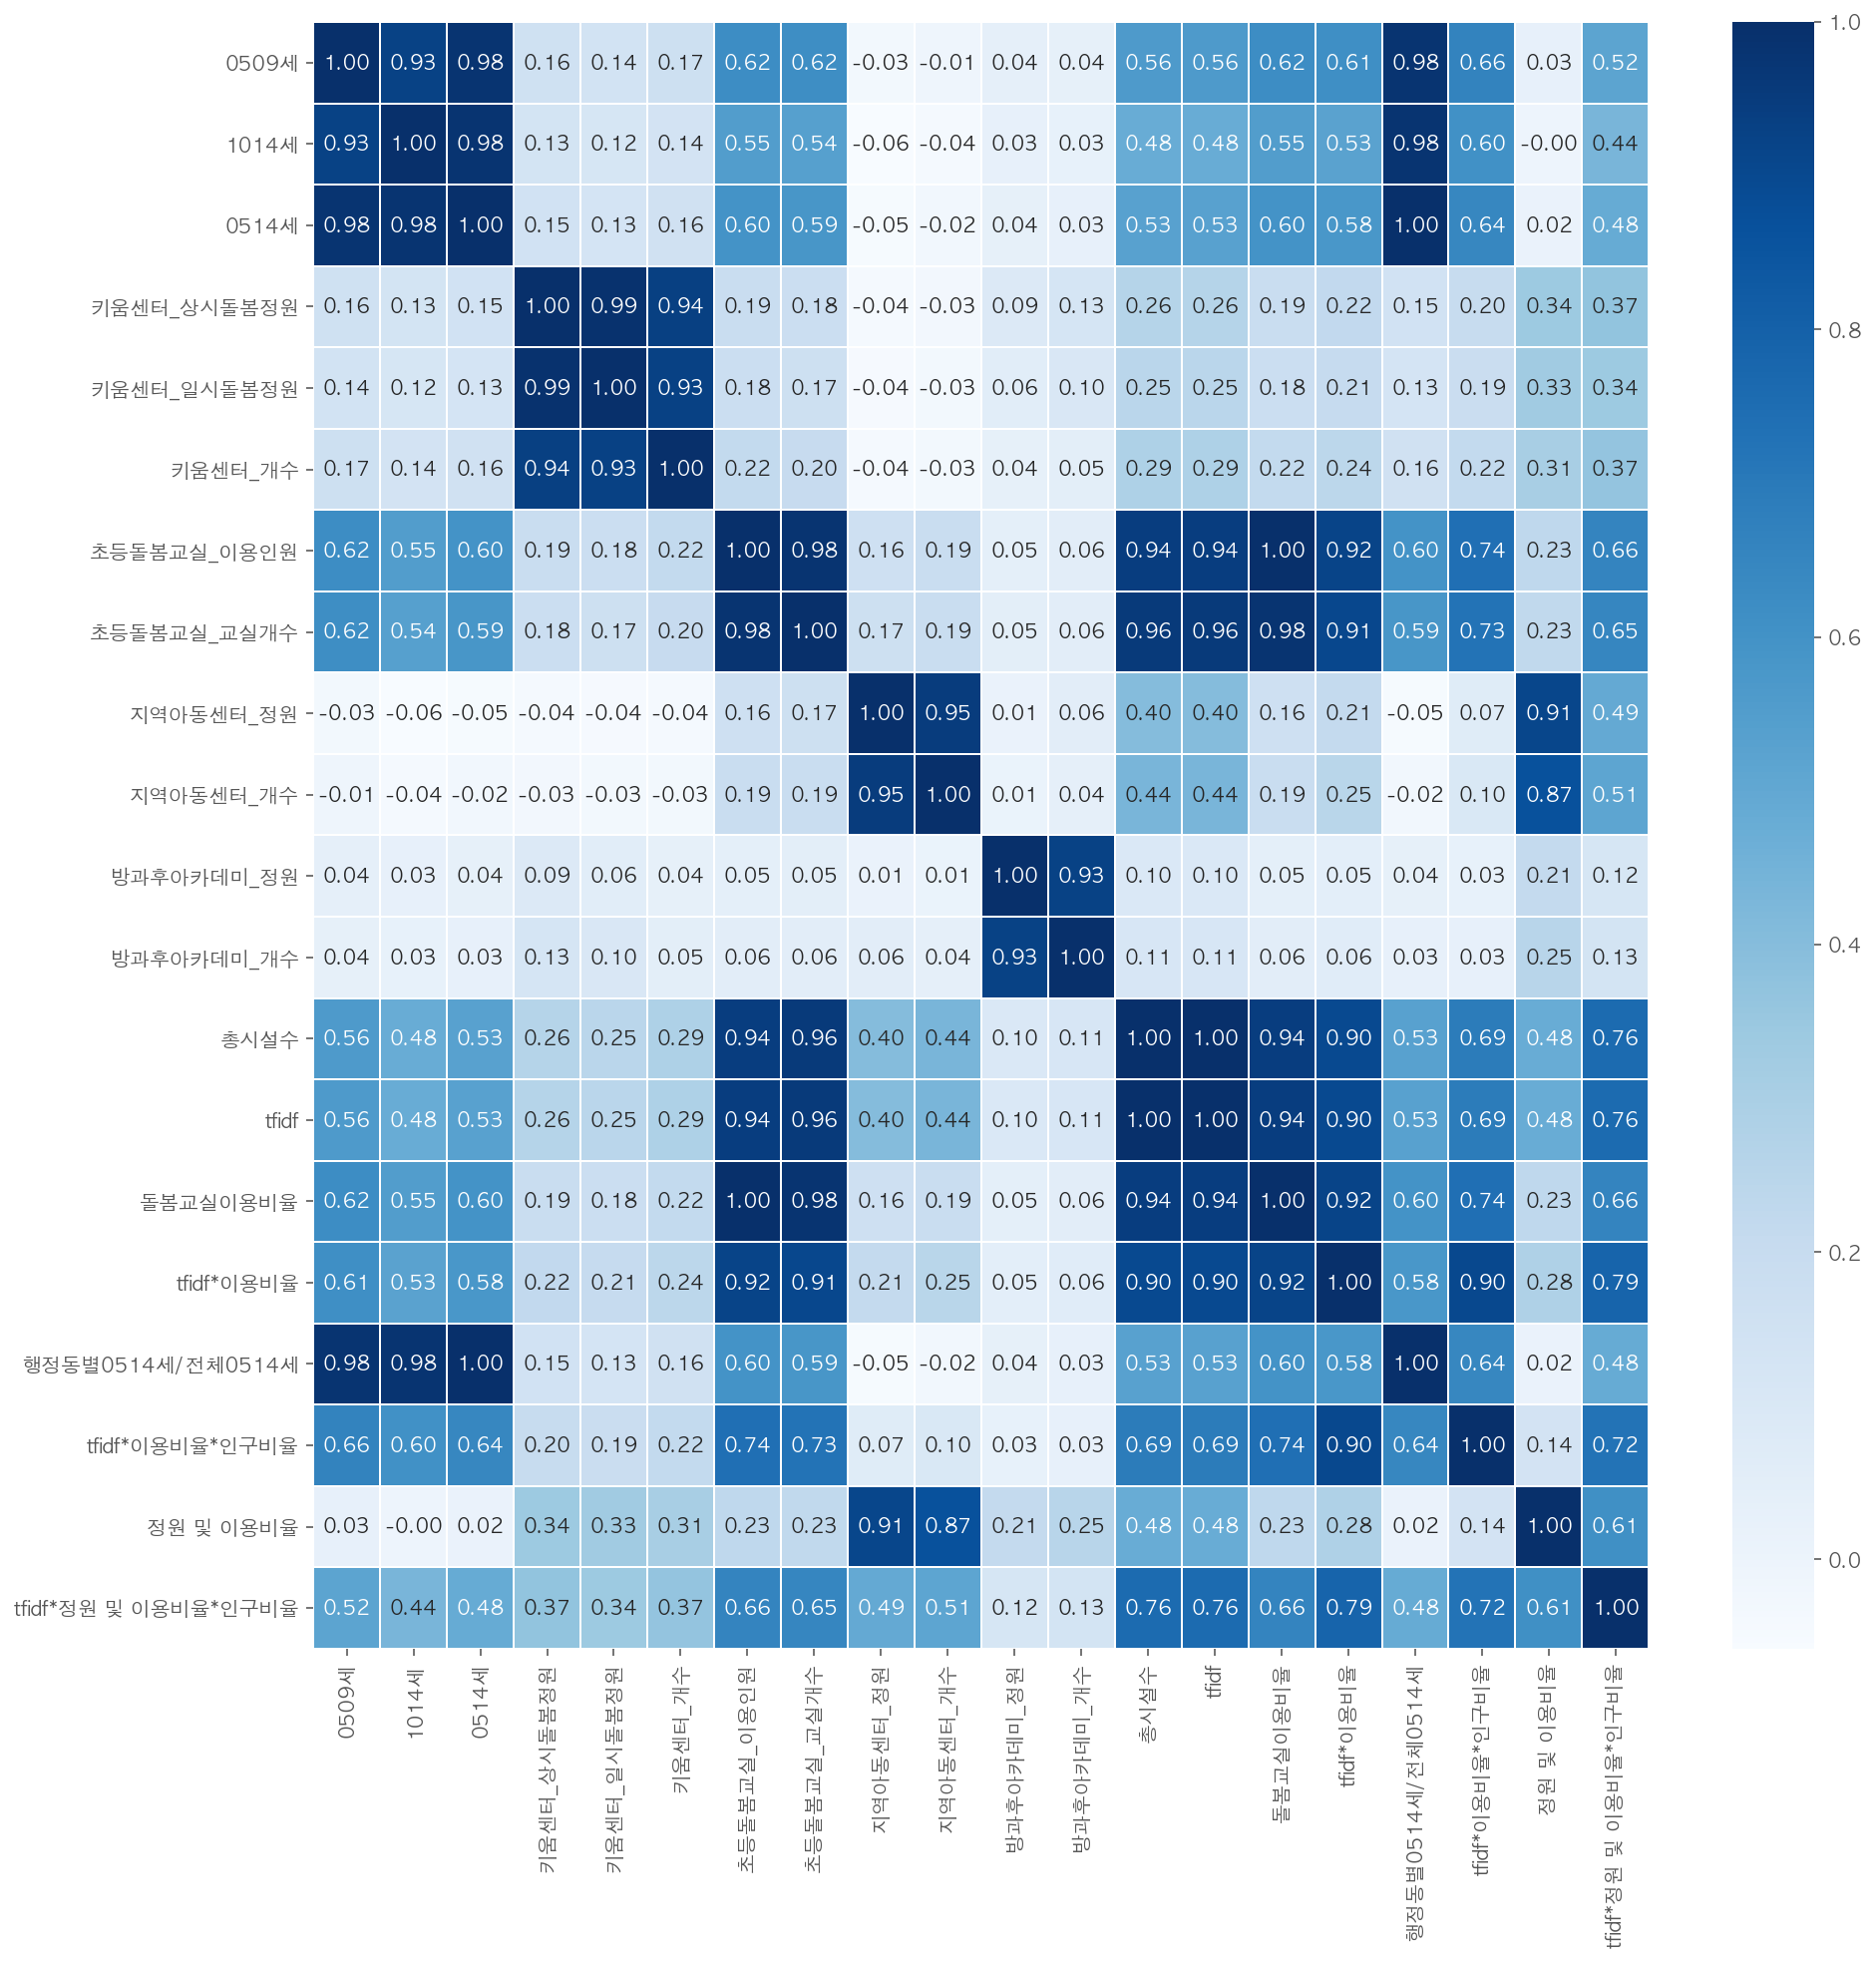

In [261]:
plt.figure(figsize=(15,15))
sns.heatmap(data=demand[['행정동', '0509세', '1014세', '0514세', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율']].corr(),annot=True, fmt='.2f',linewidth=.5,cmap='Blues')

히트맵으로 그냥 그리면 상관관계가 잘 안 나옴 --> GRA모델 사용

In [262]:
# -*- coding: utf-8 -*-
class GraModel():
    def __init__(self,inputData,p=0.5,standard=True,normalize=True):
        '''
        p: range 0~1，Generally take 0.5，
        The smaller the correlation coefficient is, 
        the greater the difference is, and the stronger the discrimination ability is
        '''
        self.inputData = np.array(inputData)
        self.p = p
        self.standard = standard
        self.normalize = normalize
        self.standarOpt()
        self.normalizOpt()
        self.buildModel()
        
    # 분석을 할 때는 데이터 표준화를 통해 outlier를 제거하고 나서 데이터 정규화를 하여 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다. 
    # standardization
    def standarOpt(self):
        if not self.standard:
            return None
        self.scaler = StandardScaler().fit(self.inputData) 
        self.inputData = self.scaler.transform(self.inputData)
    
    # normalization
    def normalizOpt(self):
        if not self.normalize:
            return None
        self.scaler = MinMaxScaler().fit(self.inputData) 
        self.inputData = self.scaler.transform(self.inputData)
        
    # modeling
    def buildModel(self):
        # 첫번째 컬럼을 대상으로
        momCol = self.inputData[:,0]
        sonCol = self.inputData[:,0:]
        for col in range(sonCol.shape[1]):
            sonCol[:,col] = abs(sonCol[:,col]-momCol)
        #최대 최소값 찾기
        minMin = sonCol.min()
        maxMax = sonCol.max()
        # 정규화된 S/N비로부터 회색 상관 계수(Grey Relational Coefficient, GC)를 계산
        cors = (minMin + self.p*maxMax)/(sonCol+self.p*maxMax)
        # 회색 관계 등급(Grey Relational Grade, Gi)를 식(8)에 따라 계산 --> corr degree 중 평균 찾기
        meanCors = cors.mean(axis=0)
        # 회색 관계 등급을 기반으로 평균 분석이나 분산 분석을 이용하여 파라미터 별 최적 수준을 선정
        self.result = {'cors':{'value':cors,'desc':'Correlation coefficient matrix'},'meanCors':{'value':meanCors,'desc':'Average comprehensive correlation coefficient'}}

if __name__ == "__main__":
    #Path directory
    curDir = os.path.dirname(os.path.abspath('__file__'))#current directory
    baseDir = os.path.dirname(curDir)#root directory
    staticDir = os.path.join(baseDir,'Static')#Static file directory
    resultDir = os.path.join(baseDir,'Result')#Results file directory
    data = np.array(data).T   # 실험 파라미터의 개수와 수준을 고려한 직교 배열표를 구성하고, 그에 따른 실험을 수행
    model = GraModel(data,standard=True)
    

In [203]:
demand.columns

Index(['행정동코드', '행정동', '0509세', '1014세', '0514세', '시군구명', '키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율'],
      dtype='object')

Text(0.5, 1.0, 'Gray Correlation Matrix')

<Figure size 432x288 with 0 Axes>

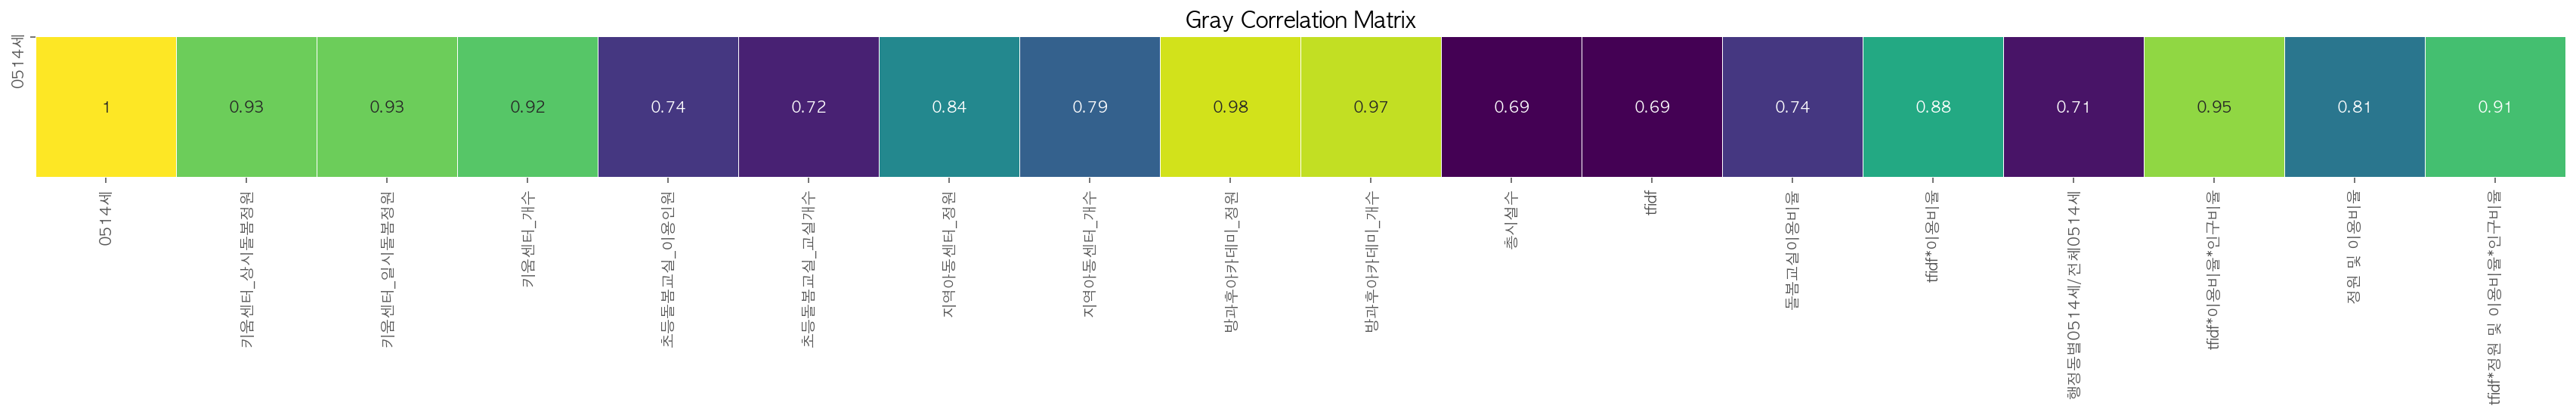

In [263]:
# -*- coding: utf-8 -*-
#Path directory
baseDir = os.path.dirname(os.path.abspath('__file__'))#current directory
staticDir = os.path.join(baseDir,'Static')#Static file directory
resultDir = os.path.join(baseDir,'Result')#Results file directory


data = demand
columns = ['0514세','키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율']
data = data[columns]

#grey relation 모델 및 표준화 데이터
model = GraModel(data,standard=True,normalize=True)
result = model.result
meanCors = result['meanCors']['value']


# 시각화
plt.clf()
plt.figure(figsize=(30,10))
sns.heatmap(meanCors.reshape(1,-1), square=True, annot=True,  cbar=False,
            vmax=1.0,
            linewidths=0.1,cmap='viridis')
plt.yticks([0,],['0514세'])
plt.xticks(np.arange(0.5,18.5,1),columns,rotation=90)
plt.title('Gray Correlation Matrix')

0514세에 대해 아래의 히트맵과 비교해보면 GRA처리 후 상관계수가 좀 더 잘 나타난다.<br>
0514세 인구와 돌봄센터 수, 방과후아카데미 수는 양의 상관관계가 크다.<br>
돌봄교실의 수는 그에 비해 초등아동인구 수와 상관관계가 떨어지지만 이용인원은 돌봄교실 수에 비해 상관관계가 높다.--> 돌봄교실 수가 충분하지 않다.<br> 
지역아동센터는 만 18세 미만까지 지원가능해서 비교적 상관관계가 떨어지는 것으로 보임.<br>
**지역아동센터는 지원대상이 만 18세 미만이고 초등돌봄교실은 초등학교 저학년 위주로 저소득·맞벌이 가정의 아동이 대상**
[지역아동센터와 돌봄교실 설명 참고](http://webzine-serii.re.kr/%EC%98%A8-%EC%84%B8%EB%8C%80%EC%99%80-%ED%95%A8%EA%BB%98-%EC%84%B1%EC%9E%A5%ED%95%98%EB%8A%94-%EB%8F%8C%EB%B4%84%EA%B5%90%EC%8B%A4/)

tfidf만 했을 때보다 돌봄교실이용비율을 함께 곱해주니 0.88로 상관계수가 높아졌다. --> 수요지수의 다른 요소 고려 필요<br>
tfidf,돌봄교실 이용 비율, 인구비율 곱했을 때(필요지수 중 아직 정원비율, 대체시설(학원)역수 취하지 않았을 때) --> 0.95<br>
tfidf,돌봄교실 이용 및 그 외 돌봄시설 정원 비율, 인구비율 곱했을 때(필요지수 중 아직 대체시설(학원)역수 취하지 않았을 때) --> 0.91<br>

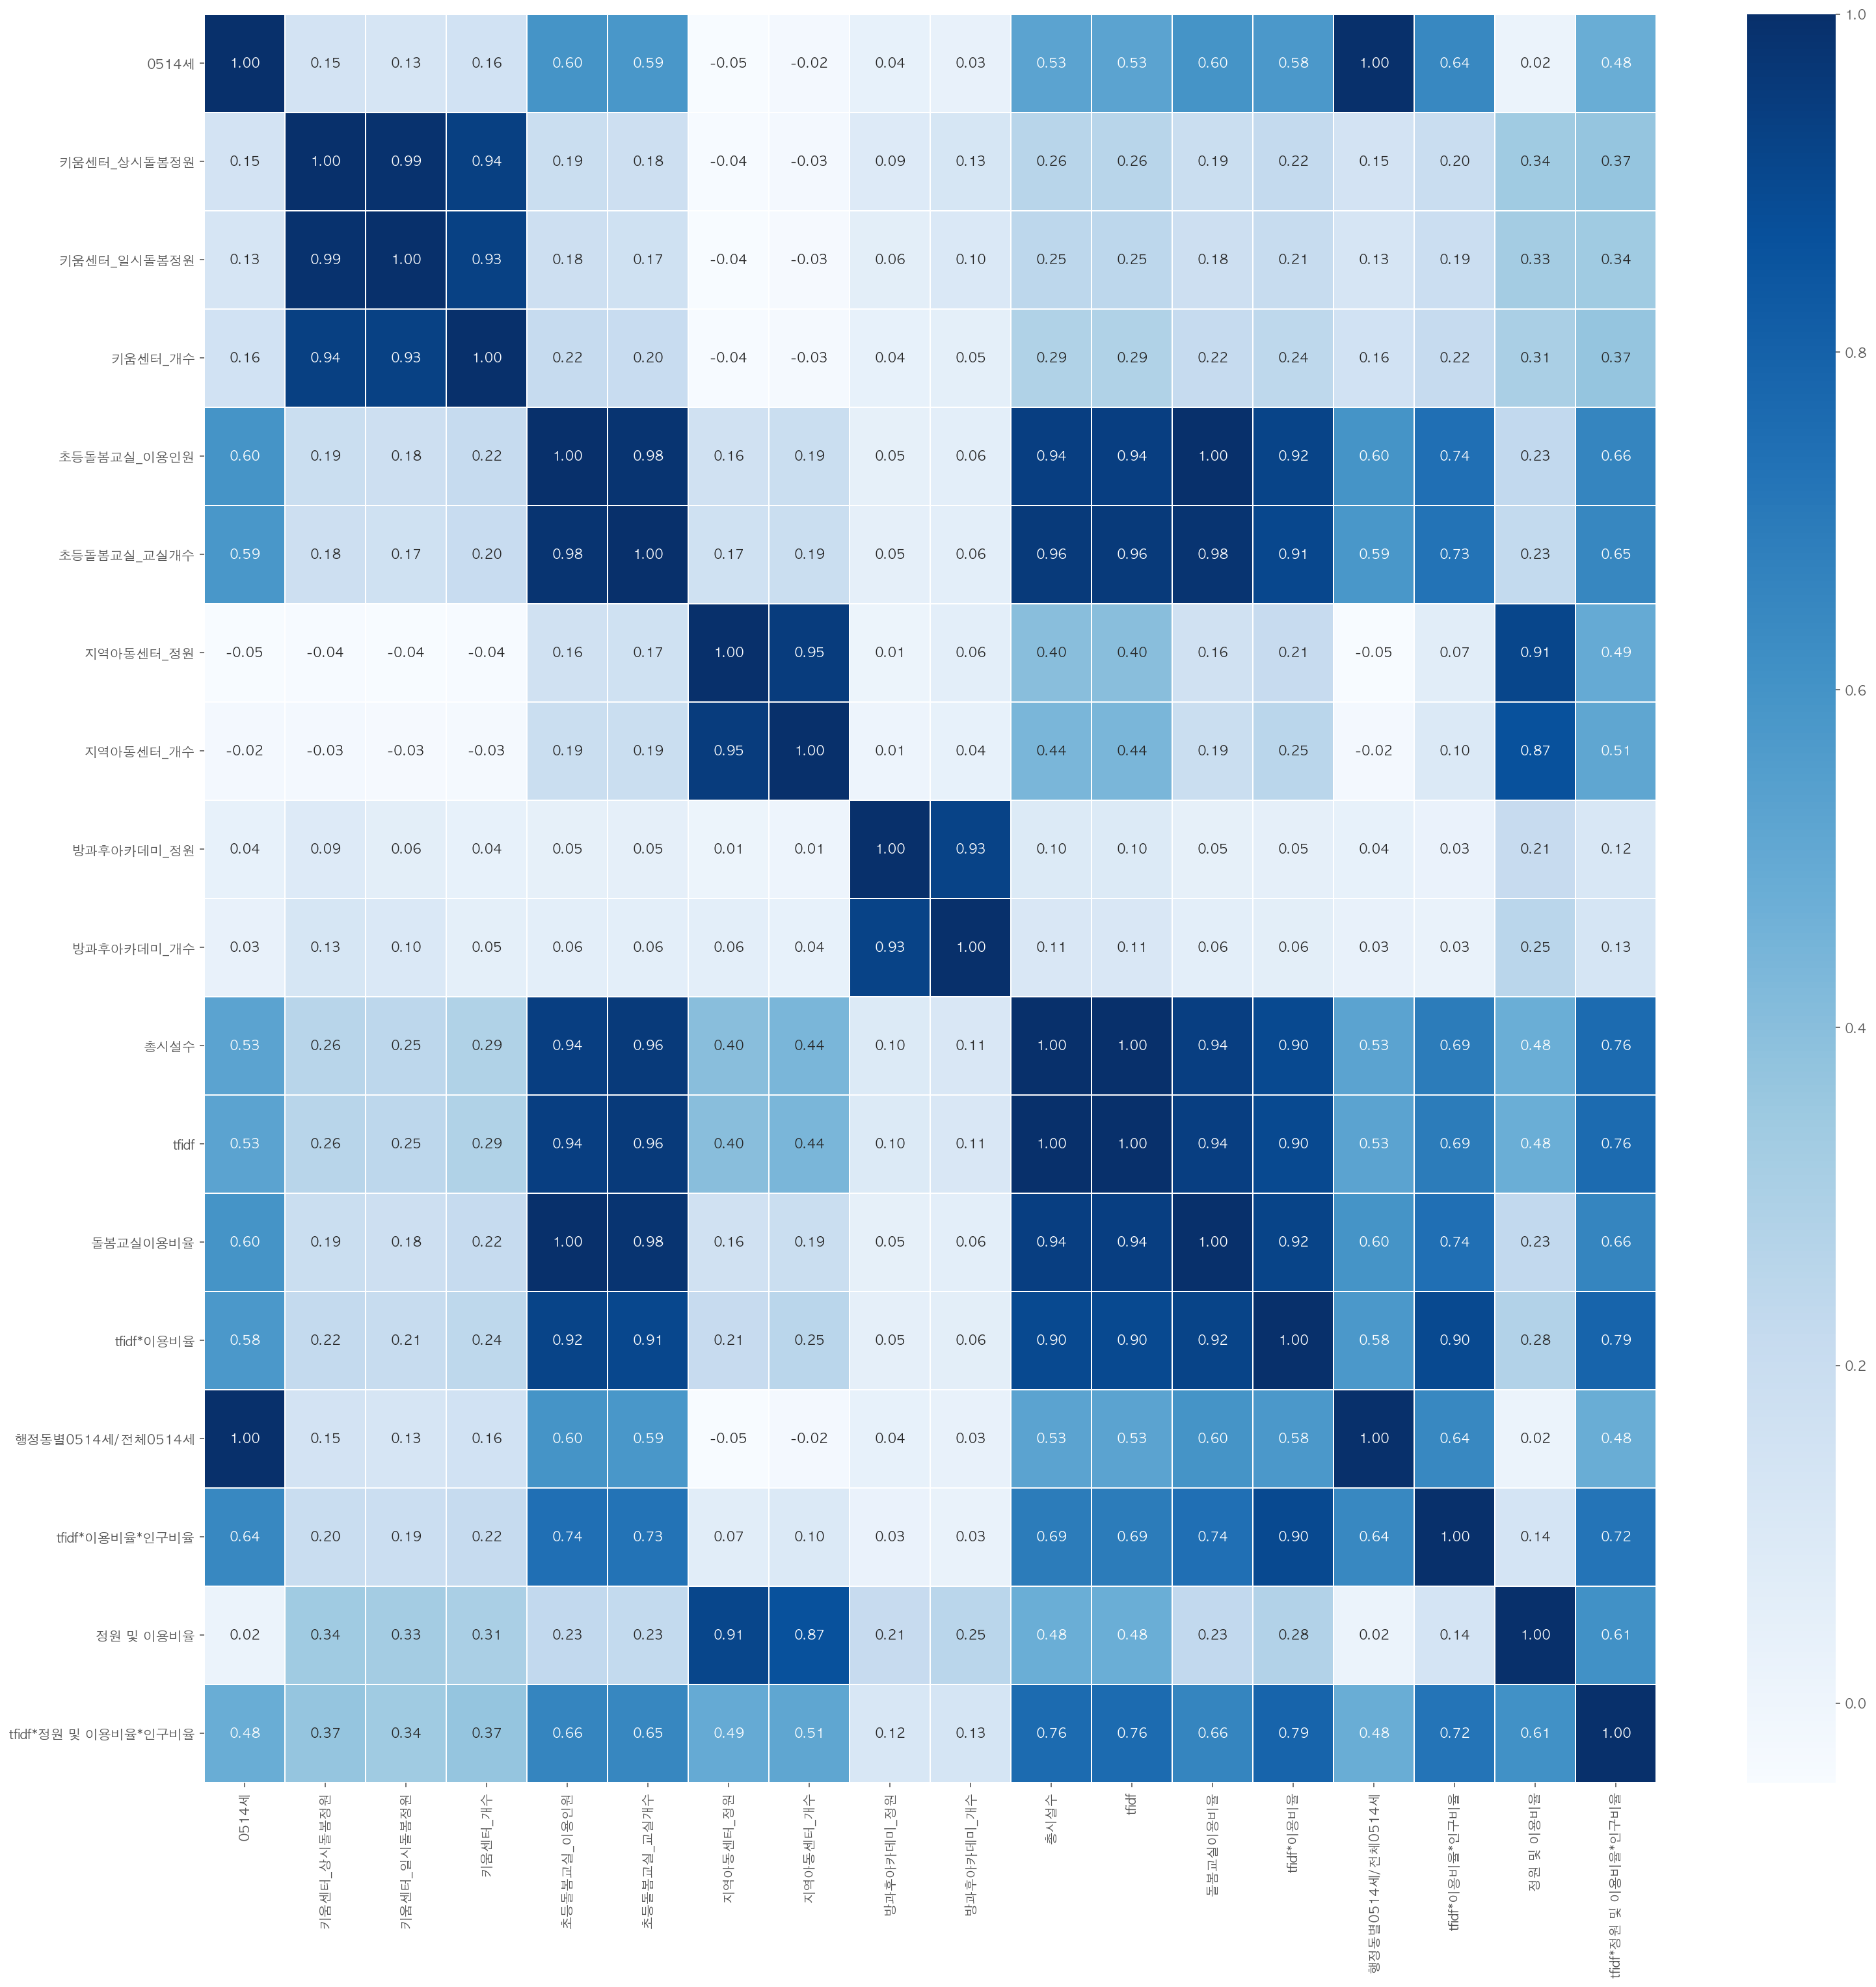

In [264]:
plt.figure(figsize=(25,25))
sns.heatmap(data=demand[['0514세','키움센터_상시돌봄정원',
       '키움센터_일시돌봄정원', '키움센터_개수', '초등돌봄교실_이용인원', '초등돌봄교실_교실개수', '지역아동센터_정원',
       '지역아동센터_개수', '방과후아카데미_정원', '방과후아카데미_개수', '총시설수', 'tfidf', '돌봄교실이용비율',
       'tfidf*이용비율', '행정동별0514세/전체0514세', 'tfidf*이용비율*인구비율', '정원 및 이용비율',
       'tfidf*정원 및 이용비율*인구비율']].corr(),annot=True, fmt='.2f',linewidth=.5,cmap='Blues')

In [270]:
# 총 시설수 합하고 대체시설 제외한 컬럼 추가 데이터프레임 저장
demand.to_pickle('행정동별_공적돌봄시설_필요지수_대체시설제외.pkl')
demand.to_csv('행정동별_공적돌봄시설_필요지수_대체시설제외.csv',index=False)

In [266]:
demand

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,...,방과후아카데미_정원,방과후아카데미_개수,총시설수,tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율,tfidf*정원 및 이용비율*인구비율
0,1117051000,후암동,565,580,1145,용산구,0.0,0.0,0.0,129.0,...,0.0,0.0,10.0,0.587518,0.002953,0.001735,0.001570,2.724401e-06,110.000058,0.101472
1,1159053000,상도제1동,1719,1565,3284,동작구,0.0,0.0,0.0,252.0,...,0.0,0.0,13.0,0.747751,0.005769,0.004314,0.004503,1.942741e-05,65.000058,0.218877
2,1111070000,숭인제1동,192,177,369,종로구,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.106822,0.000000,0.000000,0.000506,0.000000e+00,30.000058,0.001622
3,1111061500,종로1.2.3.4가동,100,99,199,종로구,0.0,0.0,0.0,50.0,...,0.0,0.0,3.0,0.213643,0.001145,0.000245,0.000273,6.673693e-08,1.000058,0.000058
4,1117057000,원효로제2동,538,571,1109,용산구,0.0,0.0,0.0,62.0,...,0.0,0.0,3.0,0.213643,0.001419,0.000303,0.001521,4.611756e-07,1.000058,0.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1153059500,가리봉동,139,128,267,구로구,0.0,0.0,0.0,77.0,...,0.0,0.0,7.0,0.427286,0.001763,0.000753,0.000366,2.757878e-07,82.000058,0.012828
420,1156055000,당산제1동,527,432,959,영등포구,25.0,5.0,1.0,0.0,...,0.0,0.0,3.0,0.213643,0.000000,0.000000,0.001315,0.000000e+00,101.000058,0.028376
421,1141072000,북가좌제2동,1024,1069,2093,서대문구,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.002870,0.000000e+00,1.000058,0.000153
422,1165062000,방배3동,764,853,1617,서초구,0.0,0.0,0.0,40.0,...,0.0,0.0,2.0,0.160232,0.000916,0.000147,0.002217,3.253677e-07,1.000058,0.000355


## 행정동별로 필요지수 sorting 해보기

In [224]:
demand = pd.read_pickle('행정동별_공적돌봄시설_필요지수_대체시설제외.pkl')

In [267]:
# 필요지수로 정렬
demand.sort_values(by='tfidf*정원 및 이용비율*인구비율',
                 axis=0,
                 ascending=False,
                 inplace=True,
                 kind='quicksort',
                 na_position='last')
demand.reset_index(drop=True, inplace=True)
demand

,행정동코드,행정동,0509세,1014세,0514세,시군구명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,...,방과후아카데미_정원,방과후아카데미_개수,총시설수,tfidf,돌봄교실이용비율,tfidf*이용비율,행정동별0514세/전체0514세,tfidf*이용비율*인구비율,정원 및 이용비율,tfidf*정원 및 이용비율*인구비율
0,1165065100,양재1동,2808,2337,5145,서초구,20.0,4.0,1.0,498.0,...,0.0,0.0,24.0,1.335269,0.011401,0.015224,0.007055,0.000107,90.000058,8.478597e-01
1,1153078000,오류제2동,2428,2079,4507,구로구,34.0,7.0,1.0,361.0,...,0.0,0.0,20.0,1.121626,0.008265,0.009270,0.006180,0.000057,96.000058,6.654787e-01
2,1150063000,방화제1동,2749,2221,4970,강서구,20.0,0.0,1.0,293.0,...,0.0,0.0,16.0,0.907983,0.006708,0.006091,0.006815,0.000042,95.000058,5.878750e-01
3,1138069000,진관동,3294,4090,7384,은평구,20.0,4.0,1.0,464.0,...,0.0,0.0,23.0,1.281858,0.010623,0.013617,0.010126,0.000138,44.000058,5.710998e-01
4,1138062500,역촌동,1694,1687,3381,은평구,20.0,4.0,1.0,134.0,...,0.0,0.0,11.0,0.640929,0.003068,0.001966,0.004636,0.000009,177.000058,5.259636e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,필동,112,68,180,중구,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000247,0.000000,1.000058,1.318420e-05
420,1114059000,광희동,75,95,170,중구,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000233,0.000000,1.000058,1.245174e-05
421,1111054000,삼청동,59,106,165,종로구,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000226,0.000000,1.000058,1.208551e-05
422,1114060500,을지로동,27,17,44,중구,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053411,0.000000,0.000000,0.000060,0.000000,1.000058,3.222804e-06


In [268]:
# 전체 구별 현황 그래프
def plot_region(df, x_axis, rc, rot_x=True, show_xlabel=True):
    plt.figure(figsize=(18, 6))

    pal = sns.color_palette("Oranges_r", df.shape[0])
    rank = df['수요지수'].argsort().argsort()
    sns.barplot(x=x_axis, y='수요지수', data=df, palette=np.array(pal[::-1])[rank])
    for idx, score in enumerate(df['수요지수']):
        plt.text(idx-0.4, score+0.003, score, size=10, weight='bold')
    plt.title(f'서울시 자치구별 돌봄시설 수요지수', size=25)
    plt.legend(fontsize=15)
    plt.ylabel(f'수요지수', size=15)
    if rot_x:
        plt.xticks(rotation=45, size=15, ha='right')
    if show_xlabel:
        plt.xlabel(x_axis, size=15)
    else:
        plt.xlabel(None)

    plt.show()  

No handles with labels found to put in legend.


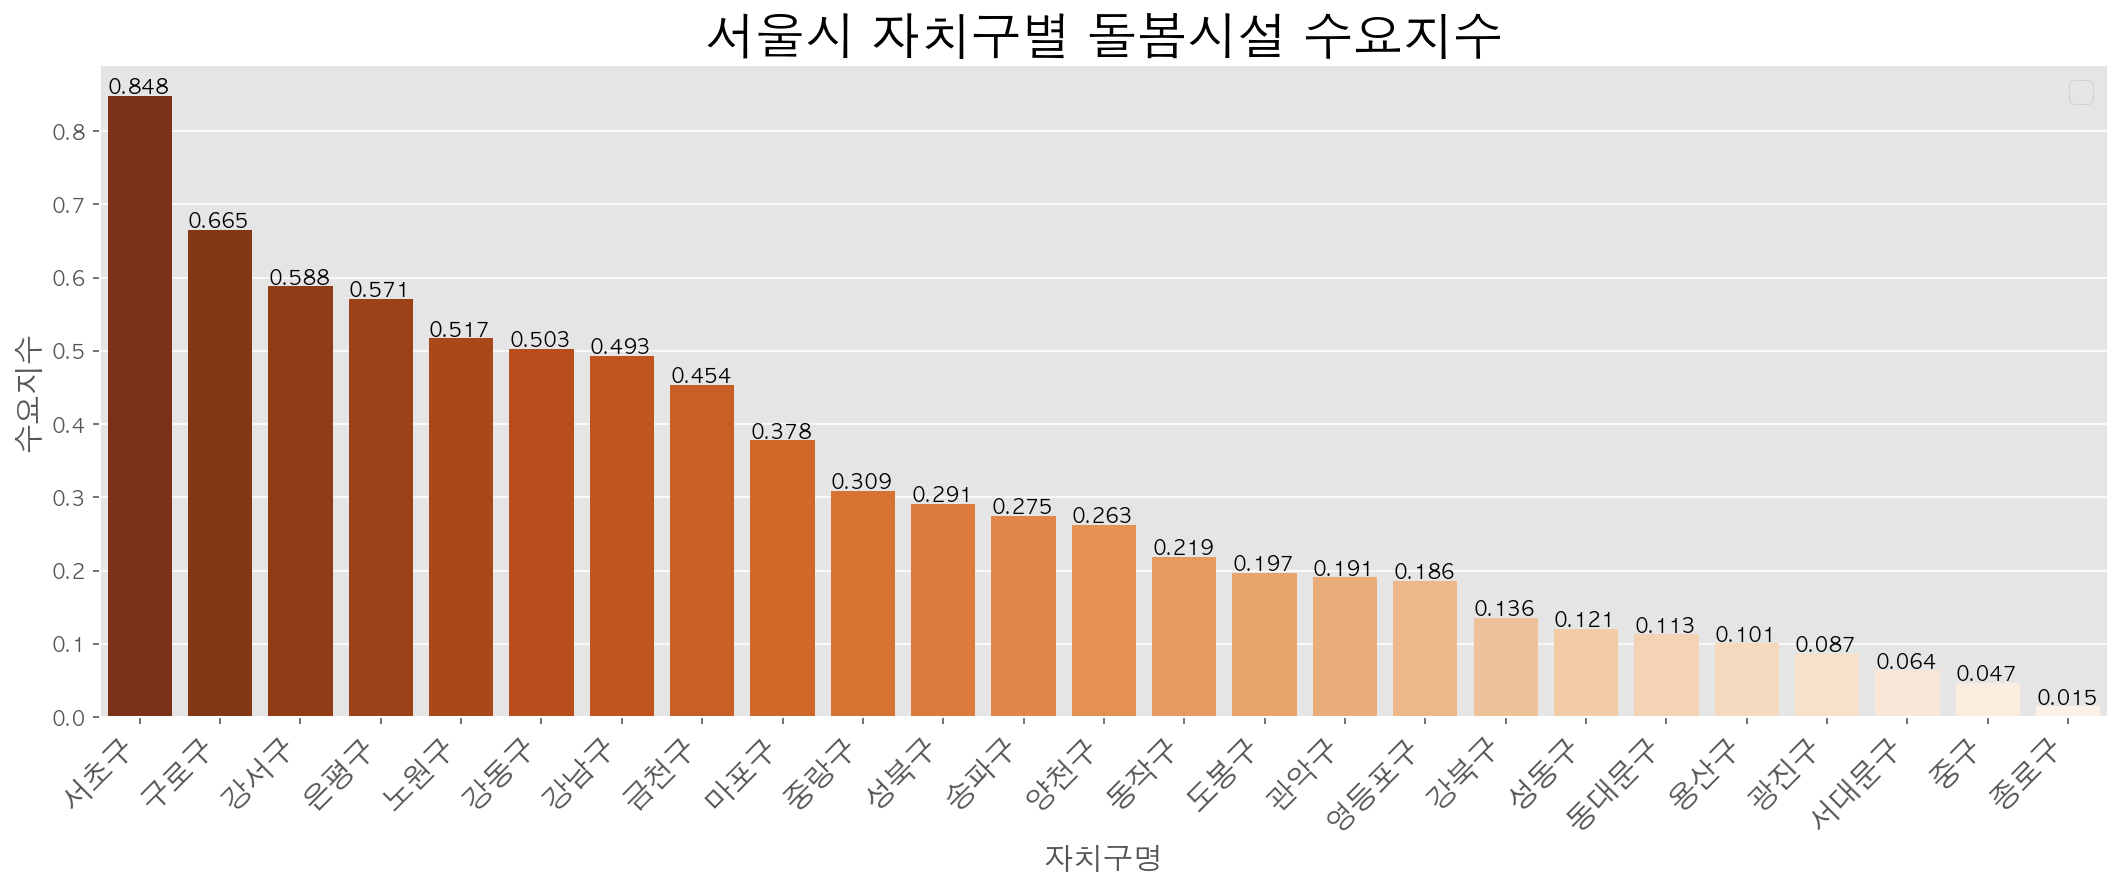

In [269]:
tmp_list = []

for gu in demand['시군구명'].unique():
    tmp_df = demand[demand['시군구명']==gu]
    tmp_list.append(round(tmp_df['tfidf*정원 및 이용비율*인구비율'].values[0],3))

dmd_gu = pd.DataFrame({'자치구명':demand['시군구명'].unique(), '수요지수':tmp_list})\
                        .sort_values('수요지수', ascending=False).reset_index(drop=True)

plot_region(dmd_gu,'자치구명','tfidf*정원 및 이용비율*인구비율')


In [281]:
# 동별 현황 그래프
def plot_dong_region(gu, x_axis, rot_x=True, show_xlabel=True):

    pop_tmp = demand[(demand['시군구명'] == f'{gu}')].reset_index(drop=True)
    tmp_list = []
    for dong in pop_tmp['행정동'].unique():
        tmp_df = pop_tmp[pop_tmp['행정동']==dong]
        tmp_list.append(round(tmp_df['tfidf*정원 및 이용비율*인구비율'].values[0],3))

    pop_dong = pd.DataFrame({'자치동명':pop_tmp['행정동'].unique(), '수요지수':tmp_list})\
                        .sort_values('수요지수', ascending=False).reset_index(drop=True)
    
    plt.figure(figsize=(18, 6))

    pal = sns.color_palette("Reds_r", pop_dong.shape[0])
    rank = pop_dong['수요지수'].argsort().argsort()
    sns.barplot(x=x_axis, y='수요지수', data=pop_dong, palette=np.array(pal[::-1])[rank])
    plt.axhline(0.25, color='red', alpha=0.5, label=f'서울시 {gu} 동별 돌봄시설 수요지수')
    for idx, score in enumerate(pop_dong['수요지수']):
        plt.text(idx-0.4, score+0.003, score, size=10, weight='bold')
    plt.title(f'서울시 {gu} {x_axis}별 돌봄시설 수요지수', size=25)
    plt.legend(fontsize=15)
    plt.ylabel(f'수요지수', size=15)
    if rot_x:
        plt.xticks(rotation=45, size=15, ha='right')
    if show_xlabel:
        plt.xlabel(x_axis, size=15)
    else:
        plt.xlabel(None)

    plt.show()

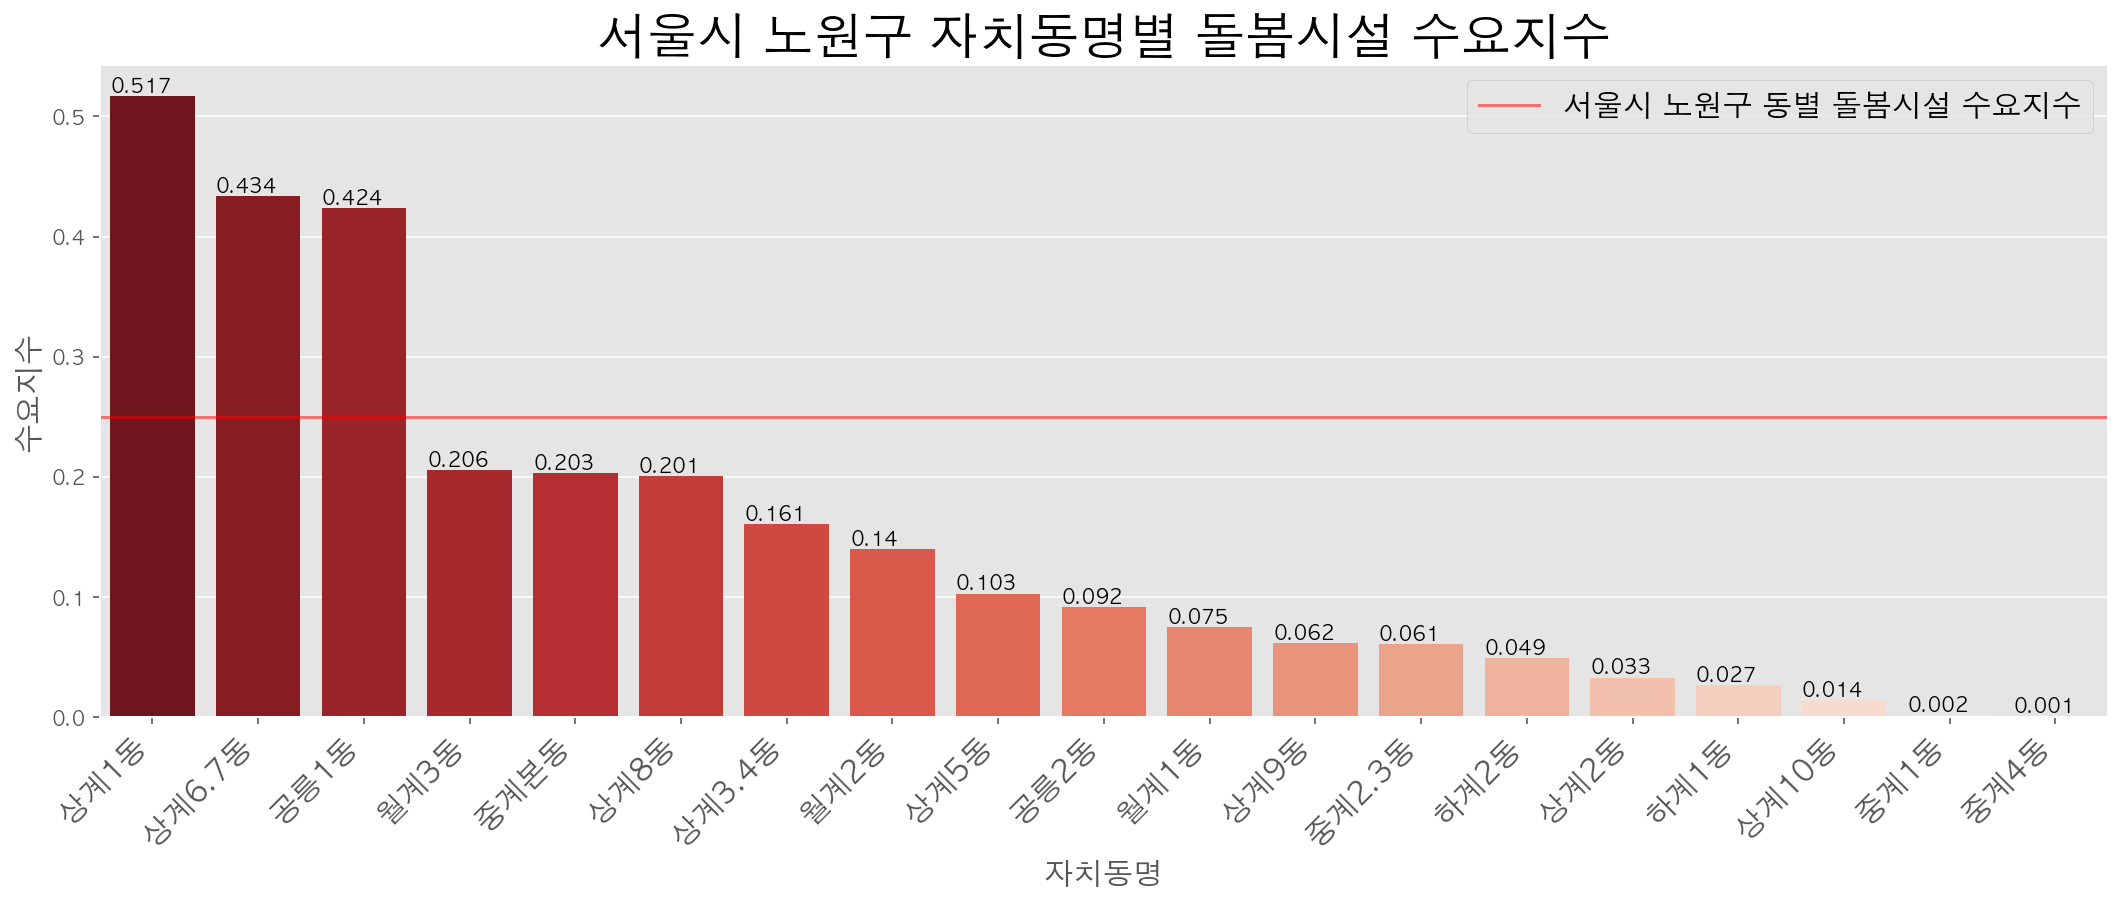

In [282]:
plot_dong_region('노원구','자치동명')

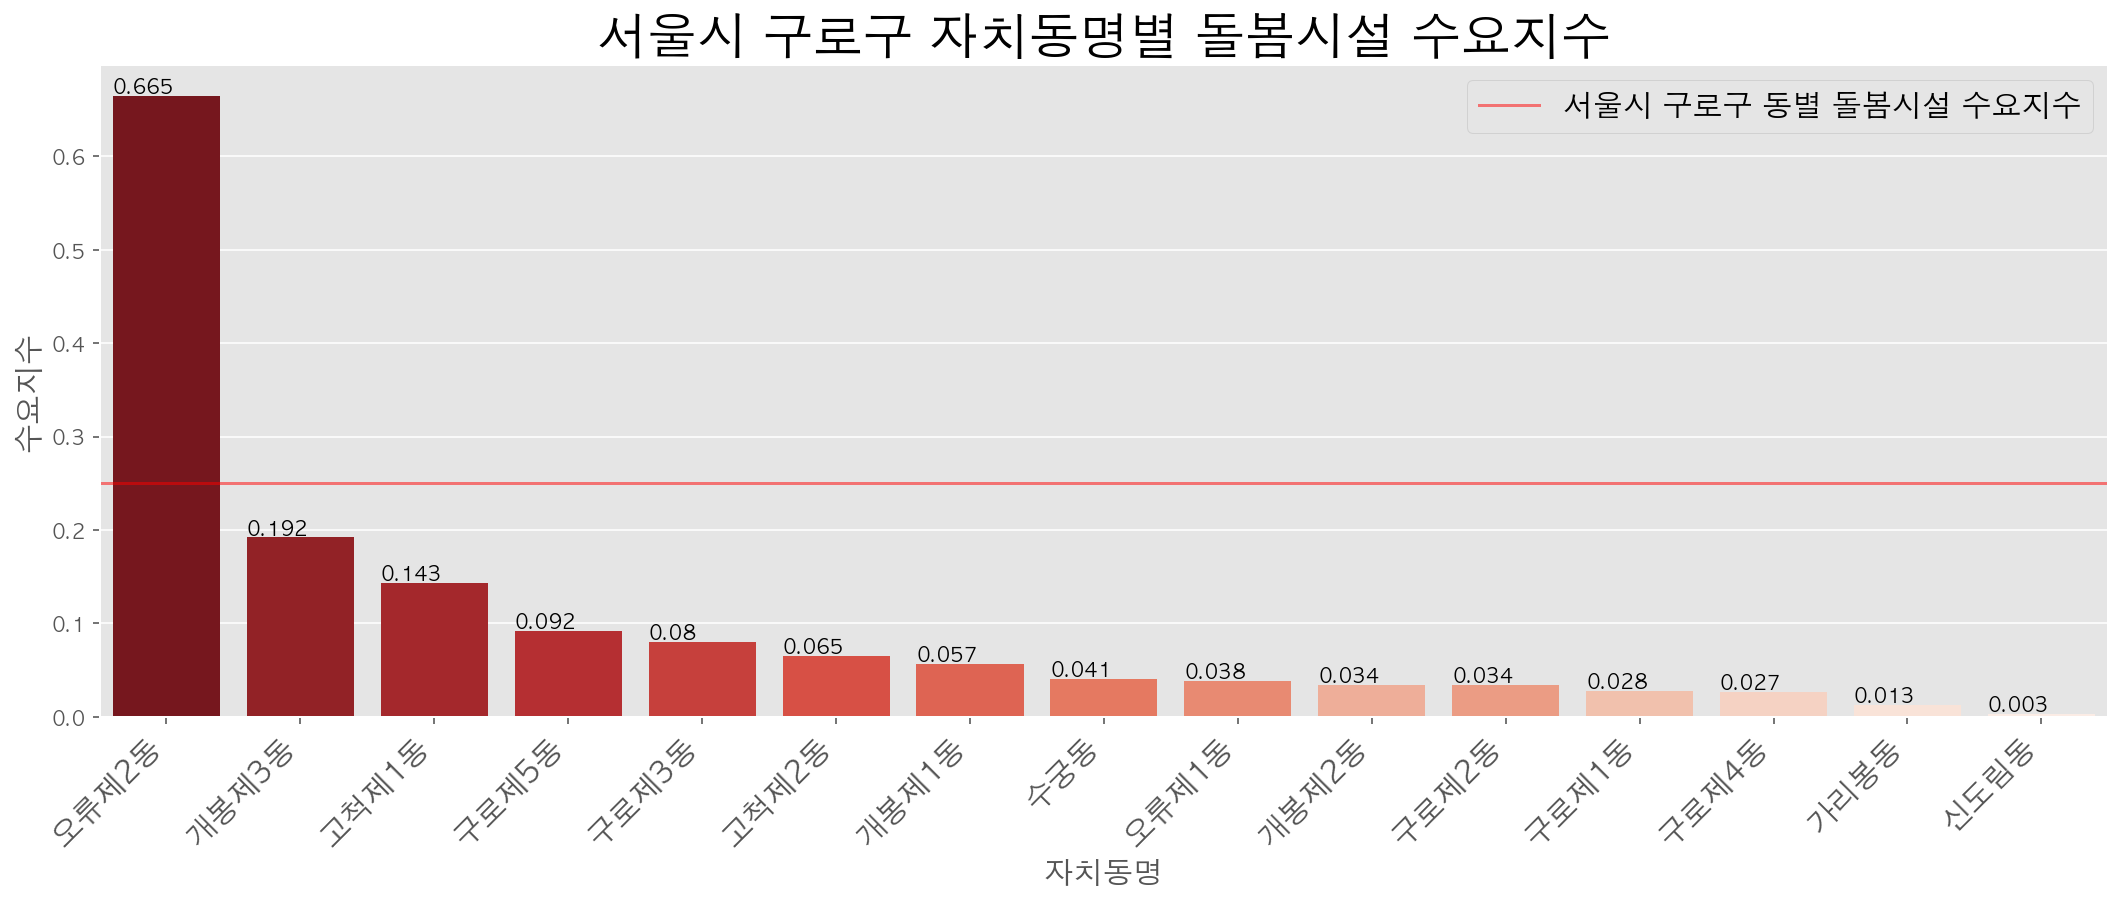

In [283]:
plot_dong_region('구로구','자치동명')